# Problem 1

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import collections


def distance(a, b):
    return np.linalg.norm(a-b)

def getInitialCenters(k, data):
    randomPoints = np.random.choice(np.arange(0, len(data)), k)
    centers = []
    for i in randomPoints:
        centers.append(data[i])
    return np.asarray(centers)


def closestCenter(centers, point, previous):
    minK = previous
    mindistance = distance(point, centers[previous])

    for i in range(len(centers)):
        if i == previous:
            continue
        dist = distance(centers[i], point)
        if dist < mindistance:
            minK = i
            mindistance = dist
    return minK

def k_means(k, data):
    centers = getInitialCenters(k, data)

    labels = collections.defaultdict(list)
    for i in range(len(data)):
        label = closestCenter(centers, data[i], 0)
        labels[label].append(data[i])

    while(True):
        for i in range(k):
            centers[i] = np.mean(labels[i], axis=0)

        newLabels = collections.defaultdict(list)
        changes = 0
        for i in range(k):
            for j in range(len(labels[i])):
                elem = labels[i][j]
                newLabel = closestCenter(centers, elem, i)
                if not (newLabel == i):
                    changes += 1
                newLabels[newLabel].append(elem)
        #print('changes', changes)
        labels = newLabels
        if changes == 0:
            break
    return centers

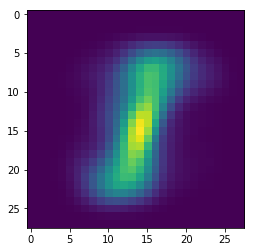

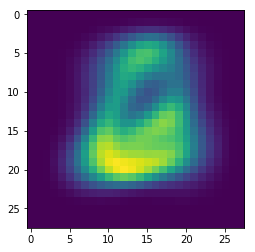

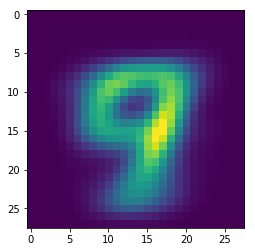

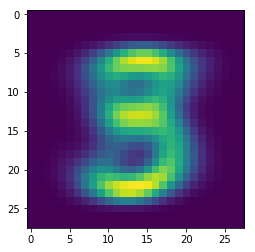

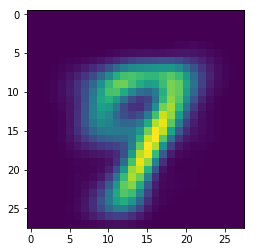

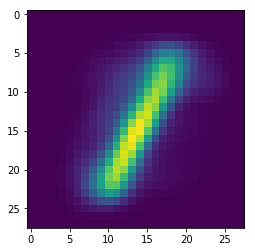

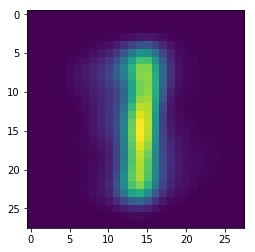

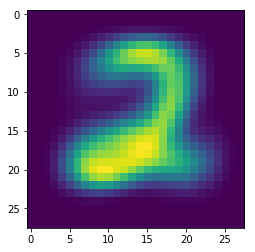

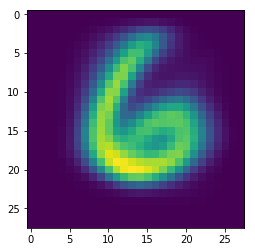

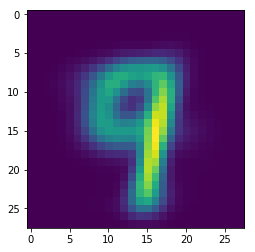

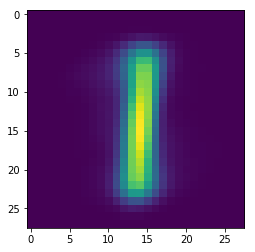

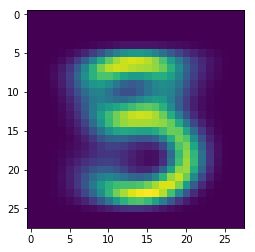

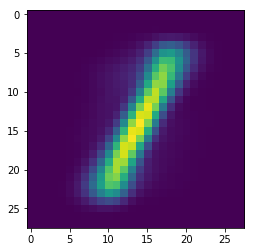

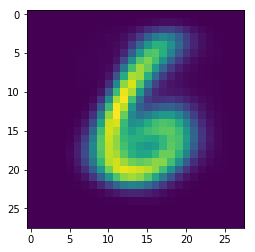

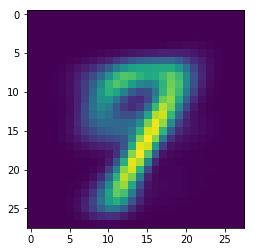

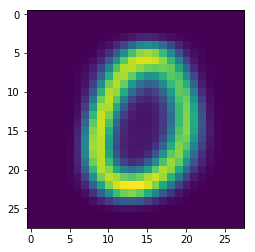

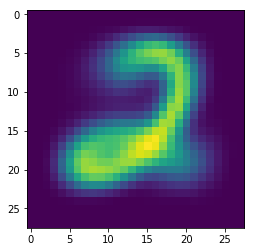

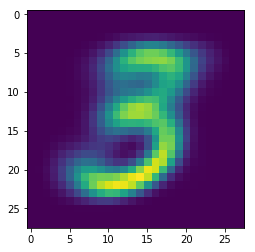

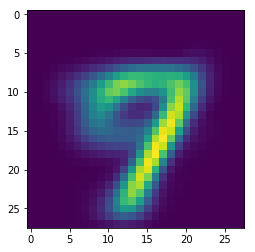

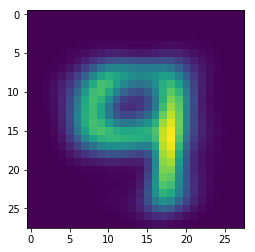

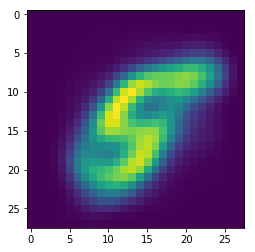

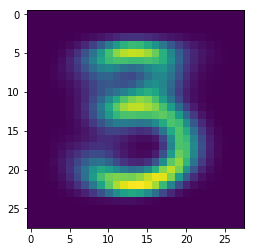

In [5]:
mnist_data = scipy.io.loadmat("hw7_data/mnist_data/images.mat")['images']
mnist_data = mnist_data.reshape(-1, 60000).T

mnist_data = mnist_data/255.0

for k in [5, 10, 20]:
    centers = k_means(k, mnist_data)
    for elem in centers:
        pixels = elem.reshape(28, 28)
        plt.imshow(pixels)
        plt.show()

Above is the visualization of the centers. The first 5 for k=5, next 10 for k=10 and last 20 for k = 20. As k increases the sharpness of the centers seems to increase, most likely corresponding to the clusters being more precise. The difference between k=10 and k=20 is minimal, although the centers might even be a little more precise for k=10, which would make since since there are actually 10 distinct classes. 

# Problem 2

Face approximations


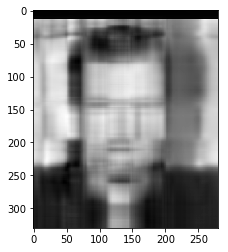

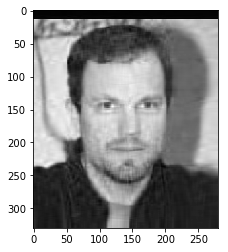

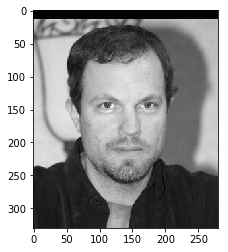

MSE of face approximations from 1-100


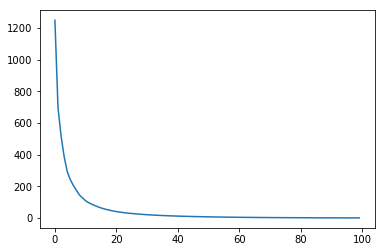

Sky approximations


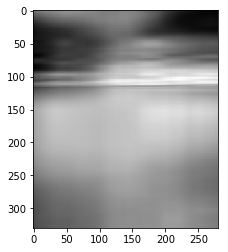

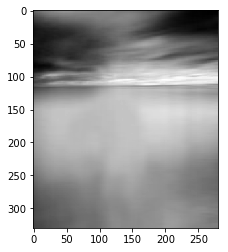

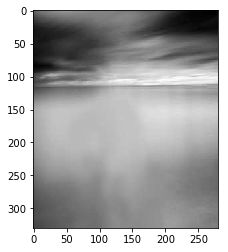

In [4]:
import skimage.io

im = skimage.io.imread("hw7_data/low-rank_data/face.jpg")
im2 = skimage.io.imread("hw7_data/low-rank_data/sky.jpg")

def k_approx(image, k):
    u, s, v = np.linalg.svd(image, full_matrices=False)
    S = np.zeros((np.diag(s).shape))
    S[:k, :k] = np.diag(s[:k])
    return np.dot(u, np.dot(S, v))


print("Face approximations")
for k in [5, 20, 100]:
    approx = k_approx(im, k)
    plt.imshow(approx, cmap='gray')
    plt.show()

print("MSE of face approximations from 1-100")
errors = []
for i in range(100):
    approx = k_approx(im, i+1)
    errors.append(np.mean((im-approx)**2))

plt.plot(errors)
plt.show()

print("Sky approximations")
for k in [5, 20, 100]:
    approx = k_approx(im2, k)
    plt.imshow(approx, cmap='gray')
    plt.show()


For the face image, when using k-approximation I always could seem to tell the difference, but it got pretty difficult past ~50-60 for k. For the sky image, however, it got difficult as early as k=~20 or so. I would guess that since the face image seems to have more detail and contrast, it needs more precision to be accurately approximated and as a person I would guess (maybe incorrectly) that humans are much better at seeing differences in a human face than in a landscape.

OPT OUT of problem 3